# Magic The Gathering Card Rarity Classification Tree
dataset source: https://www.kaggle.com/datasets/darrylljk/magic-the-gathering-card-ratings-otj <br>
by: Luis Dogo

In [36]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Dataset Generalities
there are 0 NULL values in all the attributes. <br>
number of entries: 376 <br>
number of attributes(excluding target): 18

In [37]:
df = pd.read_csv("MTG.csv")
y = df.Rarity
X = df.drop(columns = "Rarity")

In [38]:
Common = df[df.Rarity == "C"]
Uncommon = df[df.Rarity == "U"]
Rare = df[df.Rarity == "R"]
Mythic = df[df.Rarity == "M"]

Rarity
U    0.319149
C    0.242021
R    0.239362
M    0.199468
Name: count, dtype: float64


([<matplotlib.patches.Wedge at 0x741115e83a00>,
 [Text(0.5918905861272572, 0.9271815000602268, 'Uncommon'),
  Text(-1.023159659662274, 0.4039112660471101, 'Common'),
  Text(-0.4630280692735147, -0.9978000837165938, 'Rare'),
  Text(0.8909980093684439, -0.6450756136310459, 'Mythic')])

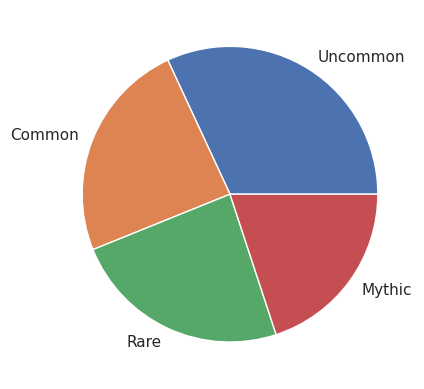

In [39]:
imbalance = df.Rarity.value_counts().apply(lambda x: x / len(df))
print(imbalance)
plt.pie(imbalance, labels = ["Uncommon", "Common", "Rare", "Mythic"])

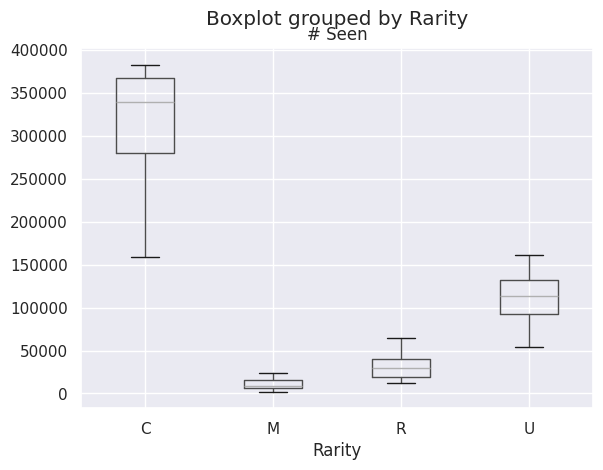

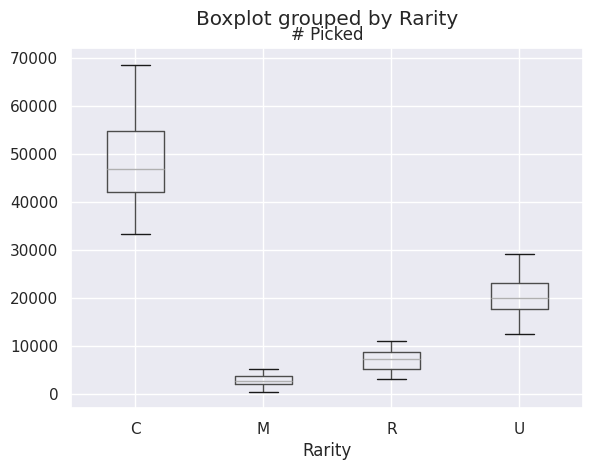

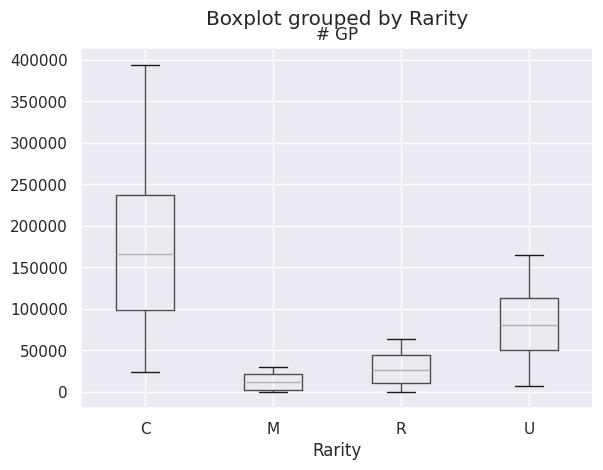

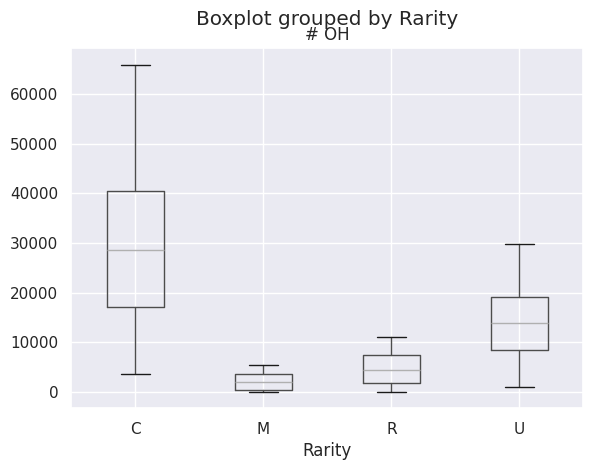

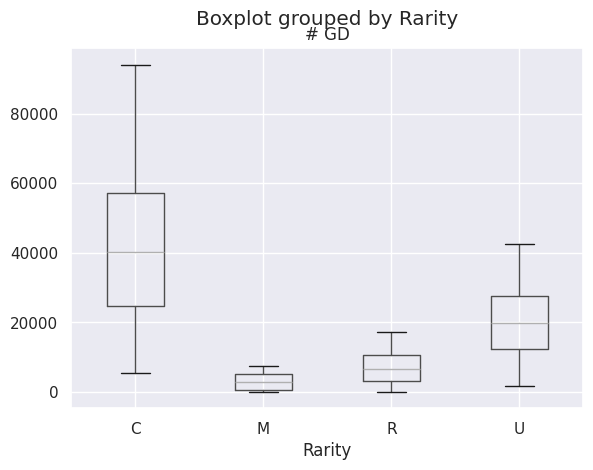

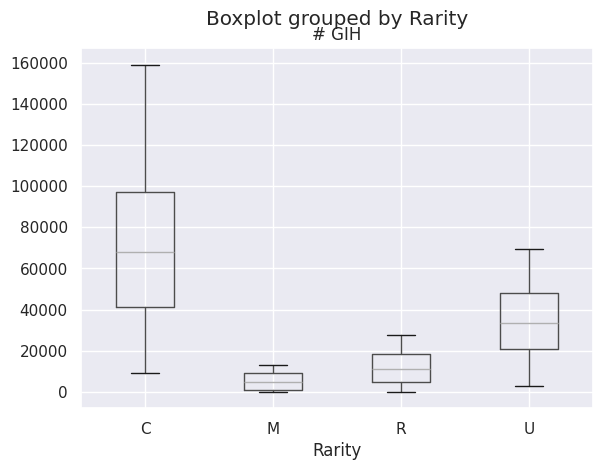

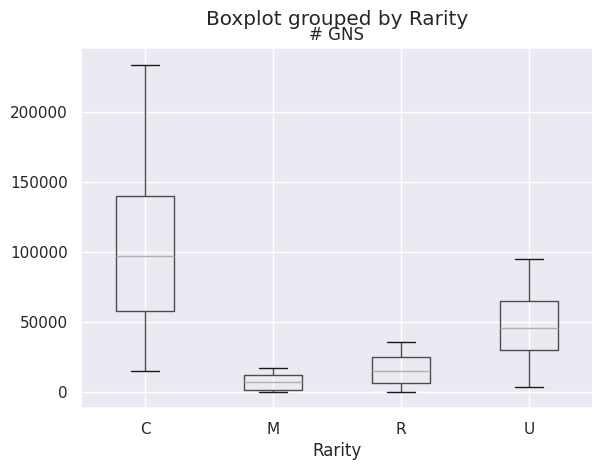

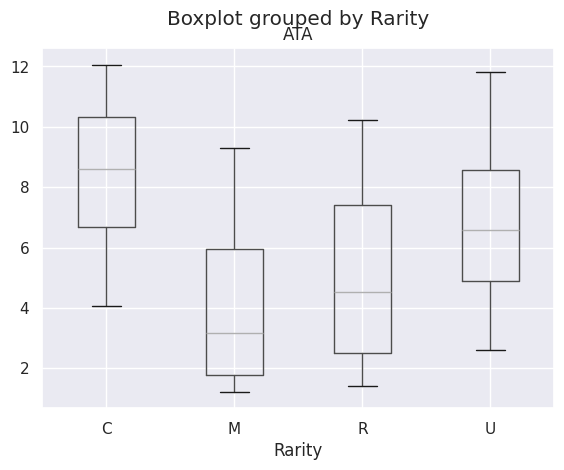

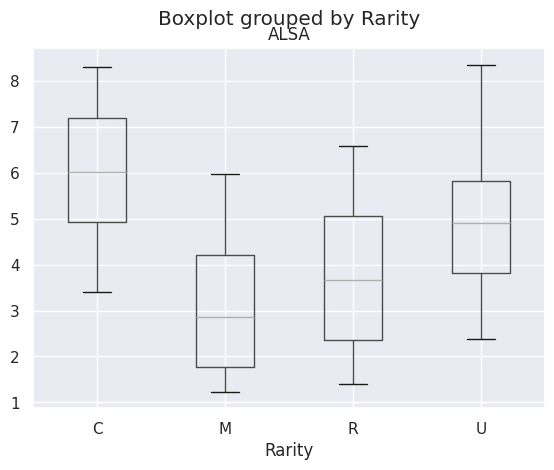

In [40]:
def boxes(atributes, grouping):
    for atribute in atributes:
        df.boxplot(column = atribute, by = grouping)

attributes = ["# Seen", "# Picked", "# GP", "# OH", "# GD", "# GIH", "# GNS", "ATA", "ALSA"]
boxes(attributes, "Rarity")



Podemos observar que las distribuciones de "# Seen" y "# Picked" son las que más distinguen entre categorías de rareza

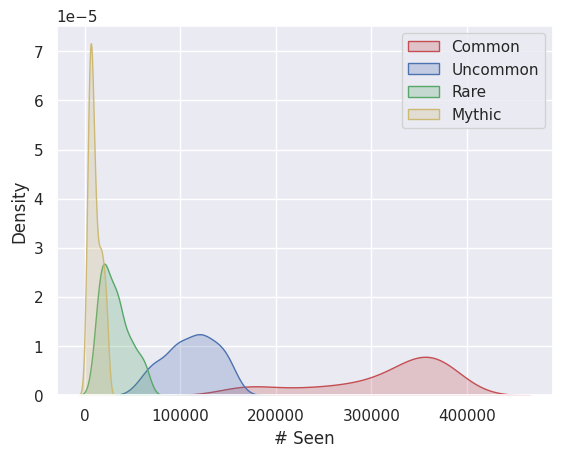

In [41]:
sns.set_theme(style="darkgrid")
#sns.kdeplot(df['# Seen'], fill=True, color="black", clip = (0,1000000))
sns.kdeplot(Common['# Seen'], fill=True, color="r")
sns.kdeplot(Uncommon['# Seen'], fill=True, color="b")
sns.kdeplot(Rare['# Seen'], fill=True, color="g")
sns.kdeplot(Mythic['# Seen'], fill=True, color="y")
plt.legend(labels=['Common', 'Uncommon', 'Rare', 'Mythic'])
plt.show()

In [42]:
atts = ["# Seen", "# Picked", "# GP", "# OH", "# GD"]
object = StandardScaler()
m = object.fit_transform(Mythic[atts])
r = object.fit_transform(Rare[atts])
u = object.fit_transform(Uncommon[atts])
c = object.fit_transform(Common[atts])
print(stats.ks_2samp(m, r).pvalue)

[0.44377809 0.3276388  0.42293903 0.42293903 0.3276388 ]


In [43]:
def per_only(string):
    return float(re.search("\d*.\d", str(string)).group())

In [44]:
df["% GP"] = df["% GP"].apply(per_only)

<Axes: title={'center': '# GP'}, xlabel='Rarity'>

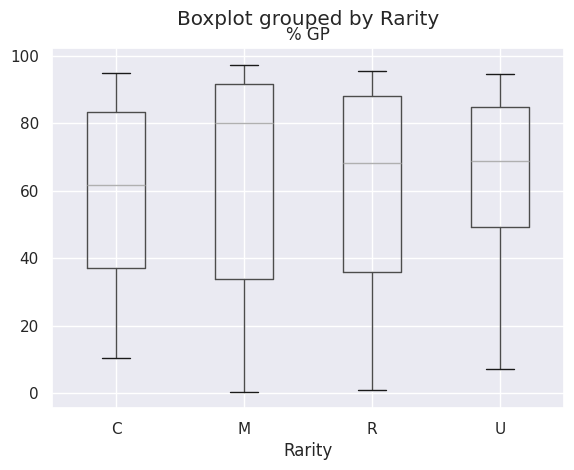

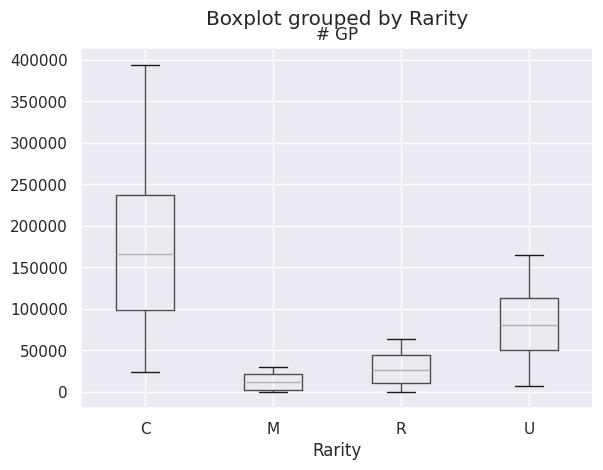

In [45]:
df.boxplot(column="% GP", by = "Rarity")
df.boxplot(column="# GP", by = "Rarity")

<Axes: >

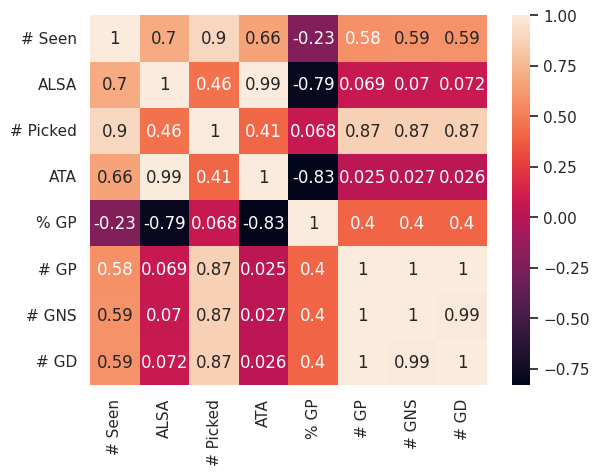

In [46]:
sns.heatmap(df[[" # Seen", "ALSA", "# Picked", "ATA", "% GP", "# GP", "# GNS", "# GD"]].corr(), annot=True)

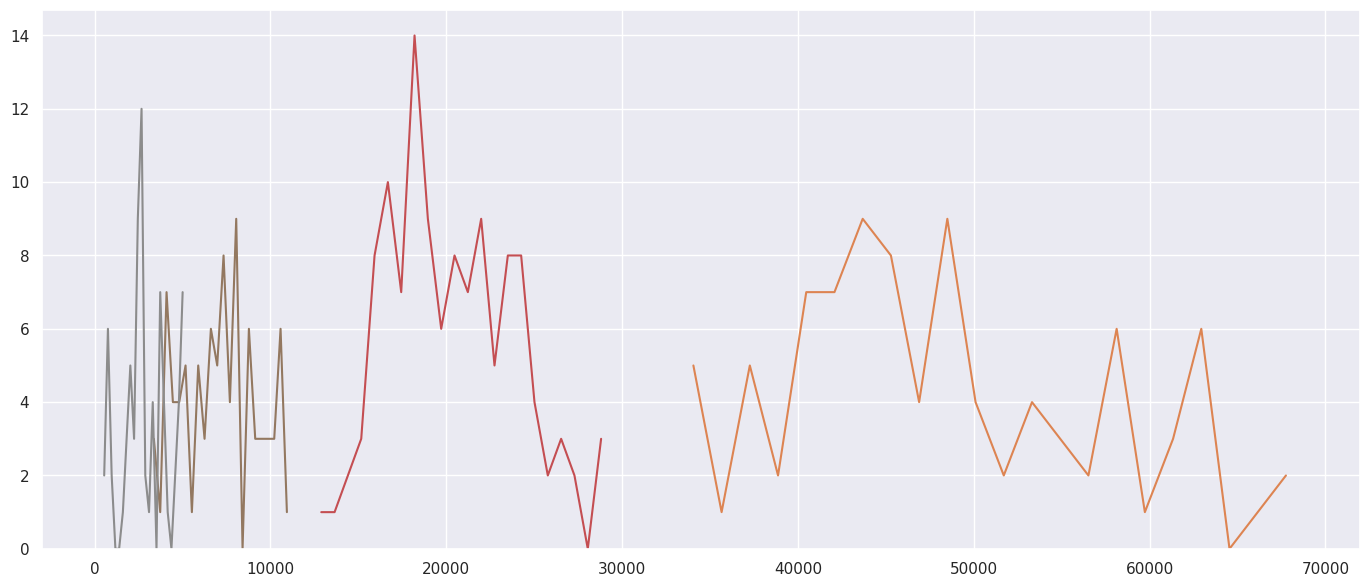

In [47]:
b = 22
fig, axs = plt.subplots(1, 1, figsize = (17, 7))
n, x, _ = plt.hist(x = Common["# Picked"], bins = b,histtype='step', alpha = 0)
bin_centers = 0.5*(x[1:]+x[:-1])
axs = plt.plot(bin_centers,n)
n, x, _ = plt.hist(x = Uncommon["# Picked"], bins = b,histtype='step',alpha = 0)
bin_centers = 0.5*(x[1:]+x[:-1])
axs = plt.plot(bin_centers,n)
n, x, _ = plt.hist(x = Rare["# Picked"], bins = b,histtype='step',alpha = 0)
bin_centers = 0.5*(x[1:]+x[:-1])
axs = plt.plot(bin_centers,n)
n, x, _ = plt.hist(x = Mythic["# Picked"], bins = b, histtype='step', alpha = 0)
bin_centers = 0.5*(x[1:]+x[:-1])
axs = plt.plot(bin_centers,n)

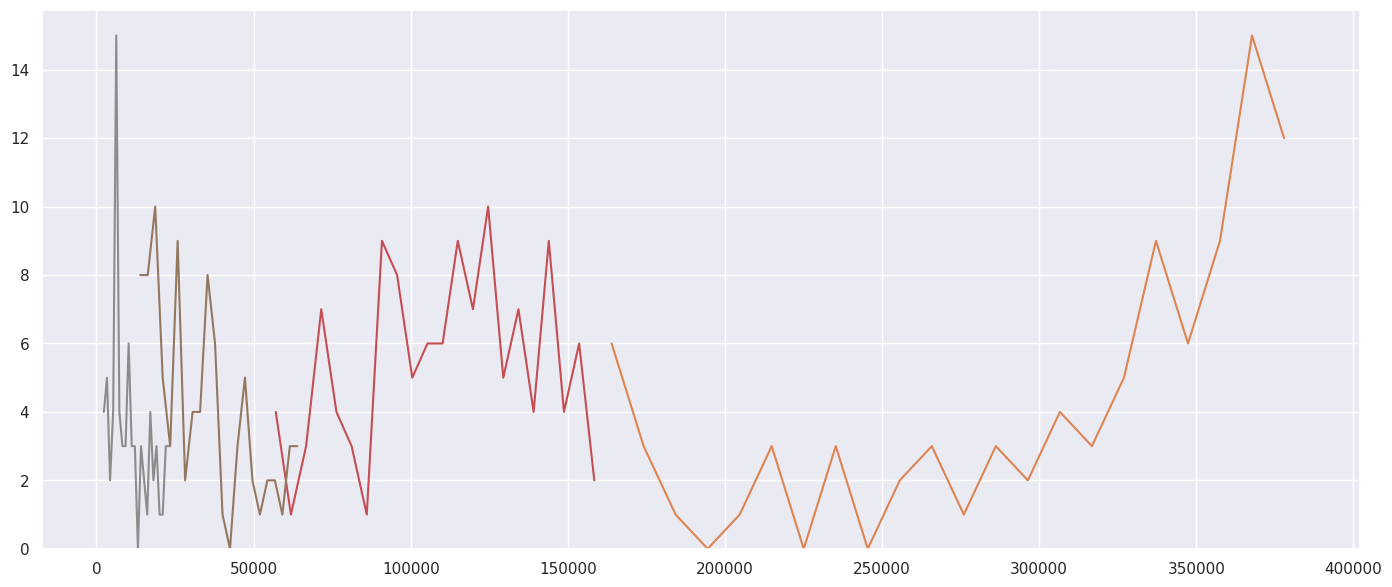

In [48]:
fig, axs = plt.subplots(1, 1, figsize = (17, 7))
n, x, _ = plt.hist(x = Common["# Seen"], bins = b,histtype='step', alpha = 0)
bin_centers = 0.5*(x[1:]+x[:-1])
axs = plt.plot(bin_centers,n)
n, x, _ = plt.hist(x = Uncommon["# Seen"], bins = b,histtype='step',alpha = 0)
bin_centers = 0.5*(x[1:]+x[:-1])
axs = plt.plot(bin_centers,n)
n, x, _ = plt.hist(x = Rare["# Seen"], bins = b,histtype='step',alpha = 0)
bin_centers = 0.5*(x[1:]+x[:-1])
axs = plt.plot(bin_centers,n)
n, x, _ = plt.hist(x = Mythic["# Seen"], bins = b, histtype='step', alpha = 0)
bin_centers = 0.5*(x[1:]+x[:-1])
axs = plt.plot(bin_centers,n)

## Model reproducibility
scikit-learn version 1.5.0 <br>
classifier: Decision tree <br>
random state = 42 <br>
test_size = .33 <br>

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
cvi = 20 # cross validation iterations

# First Iteration of the model
"# Seen" is used

In [51]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train[["# Seen"]], y_train)

[Text(0.6521739130434783, 0.96875, 'x[0] <= 158181.0\ngini = 0.749\nsamples = 251\nvalue = [65, 56, 63, 67]'),
 Text(0.6086956521739131, 0.90625, 'x[0] <= 66712.0\ngini = 0.665\nsamples = 186\nvalue = [0.0, 56.0, 63.0, 67.0]'),
 Text(0.6304347826086957, 0.9375, 'True  '),
 Text(0.5652173913043478, 0.84375, 'x[0] <= 12719.5\ngini = 0.522\nsamples = 122\nvalue = [0, 56, 63, 3]'),
 Text(0.5217391304347826, 0.78125, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0, 0]'),
 Text(0.6086956521739131, 0.78125, 'x[0] <= 23980.5\ngini = 0.381\nsamples = 83\nvalue = [0, 17, 63, 3]'),
 Text(0.43478260869565216, 0.71875, 'x[0] <= 22267.0\ngini = 0.478\nsamples = 43\nvalue = [0, 17, 26, 0]'),
 Text(0.391304347826087, 0.65625, 'x[0] <= 13960.0\ngini = 0.455\nsamples = 40\nvalue = [0, 14, 26, 0]'),
 Text(0.34782608695652173, 0.59375, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0]'),
 Text(0.43478260869565216, 0.59375, 'x[0] <= 15076.0\ngini = 0.48\nsamples = 35\nvalue = [0, 14, 21, 0]'),
 Text(0.3913043478

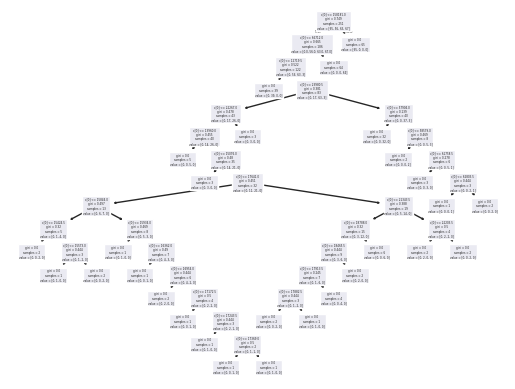

In [52]:
tree.plot_tree(clf)

In [53]:
y_pred = clf.predict(X_test[["# Seen"]])

In [54]:
y_test.value_counts()

Rarity
U    53
R    27
C    26
M    19
Name: count, dtype: int64

<Axes: >

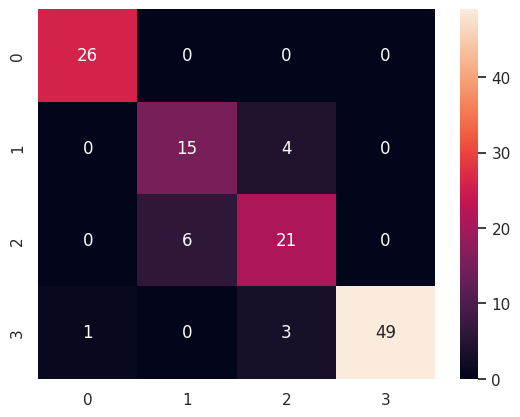

In [55]:
c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(c_matrix, annot = True)
# 3: Uncommon
# 2: Rare
# 1: Mythic
# 0: Common

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.96      1.00      0.98        26
           M       0.71      0.79      0.75        19
           R       0.75      0.78      0.76        27
           U       1.00      0.92      0.96        53

    accuracy                           0.89       125
   macro avg       0.86      0.87      0.86       125
weighted avg       0.89      0.89      0.89       125



# Second Iteration of the model
"# Seen" & "# GD" is used

In [63]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train[["# Seen", "# GD"]], y_train)

0.96 accuracy with a standard deviation of 0.02
0.96 accuracy with a standard deviation of 0.02
0.95 accuracy with a standard deviation of 0.04
0.98 accuracy with a standard deviation of 0.02
0.96 accuracy with a standard deviation of 0.03
0.96 accuracy with a standard deviation of 0.02
0.96 accuracy with a standard deviation of 0.03
0.99 accuracy with a standard deviation of 0.02
0.98 accuracy with a standard deviation of 0.03
0.96 accuracy with a standard deviation of 0.04
0.98 accuracy with a standard deviation of 0.03
0.97 accuracy with a standard deviation of 0.04
0.97 accuracy with a standard deviation of 0.05
0.97 accuracy with a standard deviation of 0.04
0.98 accuracy with a standard deviation of 0.04
0.98 accuracy with a standard deviation of 0.05
0.97 accuracy with a standard deviation of 0.05
0.97 accuracy with a standard deviation of 0.05


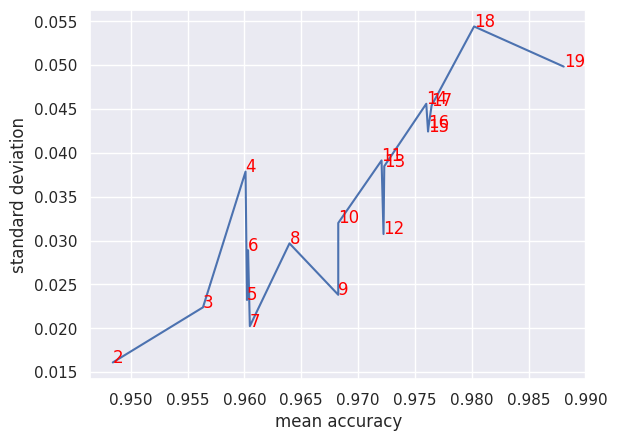

In [64]:
m = []
s = []
for i in range(2,cvi):
    score = cross_val_score(clf, X_train[["# Seen", "# GD"]], y_train, cv = i)
    m.append(score.mean())
    s.append(score.std())
    print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))
means = np.array(m)
stds = np.array(s)
means.sort()
plt.plot(means, stds)
i = 2
for x, y in zip(means, stds):
    plt.text(x, y, str(i), color="red", fontsize=12)
    i += 1
plt.plot(means.mean(), stds.mean())
plt.xlabel("mean accuracy")
plt.ylabel("standard deviation")
plt.show()


In [59]:
y_pred = clf.predict(X_test[["# Seen", "# GD"]])

<Axes: >

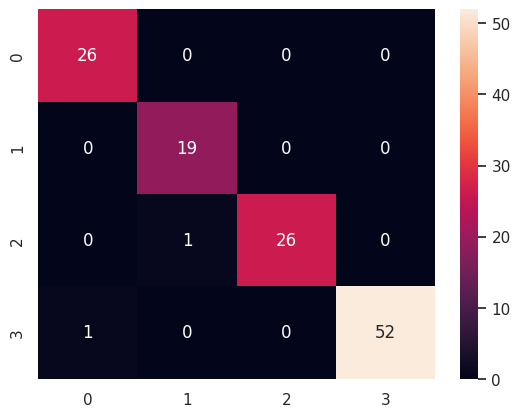

In [60]:
c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(c_matrix, annot = True)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.96      1.00      0.98        26
           M       0.95      1.00      0.97        19
           R       1.00      0.96      0.98        27
           U       1.00      0.98      0.99        53

    accuracy                           0.98       125
   macro avg       0.98      0.99      0.98       125
weighted avg       0.98      0.98      0.98       125



[Text(0.6666666666666666, 0.9375, 'x[0] <= 158181.0\ngini = 0.749\nsamples = 251\nvalue = [65, 56, 63, 67]'),
 Text(0.5, 0.8125, 'x[0] <= 66712.0\ngini = 0.665\nsamples = 186\nvalue = [0.0, 56.0, 63.0, 67.0]'),
 Text(0.5833333333333333, 0.875, 'True  '),
 Text(0.3333333333333333, 0.6875, 'x[0] <= 12719.5\ngini = 0.522\nsamples = 122\nvalue = [0, 56, 63, 3]'),
 Text(0.16666666666666666, 0.5625, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0, 0]'),
 Text(0.5, 0.5625, 'x[1] <= 215.0\ngini = 0.381\nsamples = 83\nvalue = [0, 17, 63, 3]'),
 Text(0.3333333333333333, 0.4375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0]'),
 Text(0.6666666666666666, 0.4375, 'x[1] <= 22930.0\ngini = 0.294\nsamples = 76\nvalue = [0, 10, 63, 3]'),
 Text(0.5, 0.3125, 'x[1] <= 3592.0\ngini = 0.236\nsamples = 73\nvalue = [0, 10, 63, 0]'),
 Text(0.3333333333333333, 0.1875, 'x[0] <= 26279.5\ngini = 0.459\nsamples = 28\nvalue = [0, 10, 18, 0]'),
 Text(0.16666666666666666, 0.0625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10

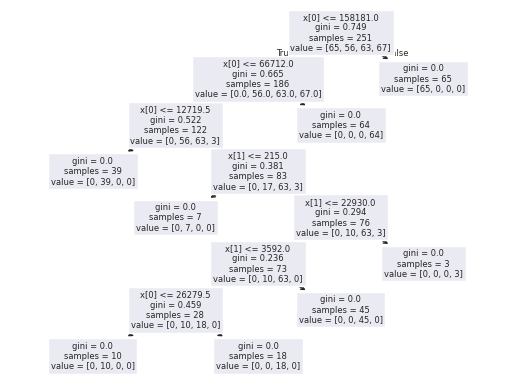

In [65]:
tree.plot_tree(clf)